# CNN(Convolutional Neural Network)
- Used framework: tensorflow

## Data preprocessing

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 

from tensorflow.keras import datasets

%matplotlib inline

In [5]:
mnist = datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### image 와 label 확인

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
image = X_train[0]
image.shape

(28, 28)

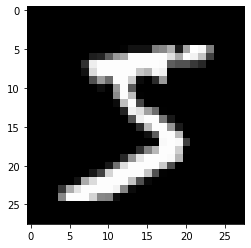

In [8]:
plt.imshow(image, 'gray')
plt.show()

#### 모델에 들어가야하는 데이터의 형태: (batch_size, height, width, channel)

In [9]:
new_X_train = X_train[..., tf.newaxis]
new_X_train.shape

(60000, 28, 28, 1)

In [10]:
disp = np.squeeze(new_X_train[0])
disp.shape

(28, 28)

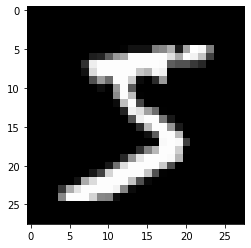

In [11]:
plt.imshow(disp, 'gray')
plt.show()

In [12]:
y_train.shape

(60000,)

In [13]:
y_train[0]

5

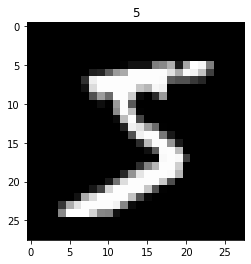

In [14]:
plt.title(y_train[0])
plt.imshow(X_train[0], 'gray')
plt.show()

### OneHot Encoding

In [16]:
from tensorflow.keras.utils import to_categorical

label = y_train[0]
label_onehot = to_categorical(label, num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

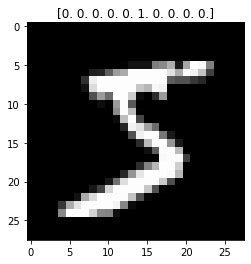

In [18]:
plt.title(label_onehot)
plt.imshow(X_train[0], 'gray')
plt.show()

## Layer Explaination

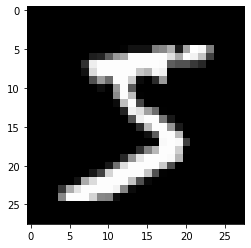

In [20]:
plt.imshow(image, 'gray')
plt.show()

In [21]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

# Feature Extraction

### Convolution

In [27]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), padding='SAME')

### Visualization

In [26]:
image = tf.cast(image, dtype=tf.float32) # integer 형은 오류가 날 수 있다
image.dtype

tf.float32

In [30]:
layer = tf.keras.layers.Conv2D(5, 3, 1, padding='SAME')
layer

In [31]:
output = layer(image)
output

<tf.Tensor: shape=(1, 28, 28, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0

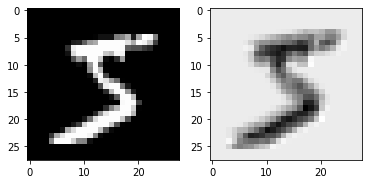

In [33]:
plt.subplot(1,2,1)
plt.imshow(image[0, :, :, 0], 'gray')
plt.subplot(1,2,2)
plt.imshow(output[0, :, :, 0], 'gray')
plt.show()

In [35]:
print(np.min(image), np.max(image))
print(np.min(output), np.max(output))

0.0 255.0
-299.92413 207.22662


#### weight 확인하기

In [40]:
weight = layer.get_weights()
print(weight[0].shape) # weight
print(weight[1].shape) # bias

(3, 3, 1, 5)
(5,)


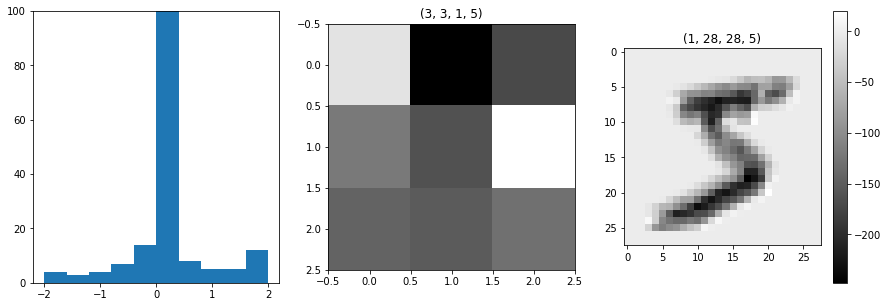

In [41]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:, :, 0, 0], 'gray')
plt.subplot(133)
plt.imshow(output[0, :, :, 0], 'gray')
plt.title(output.shape)
plt.colorbar()
plt.show()

### Activation Function
- ReLu 사용

In [42]:
np.min(output), np.max(output)

(-299.92413, 207.22662)

In [44]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)
act_output

<tf.Tensor: shape=(1, 28, 28, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0

In [45]:
np.min(act_output), np.max(act_output)

(0.0, 207.22662)

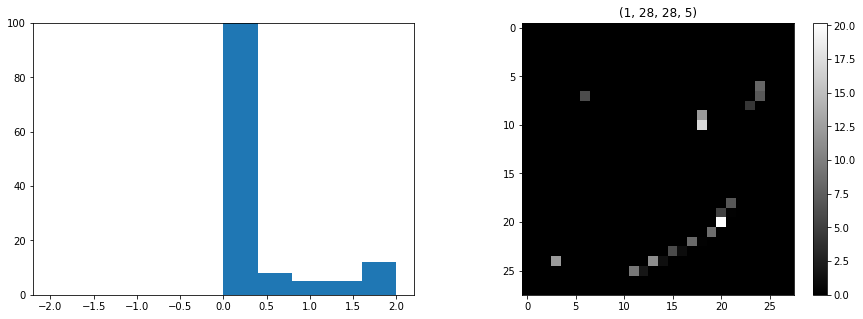

In [53]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)
plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

### Pooling(MaxPool)

In [51]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
pool_output = pool_layer(act_output)
pool_output.shape

TensorShape([1, 14, 14, 5])

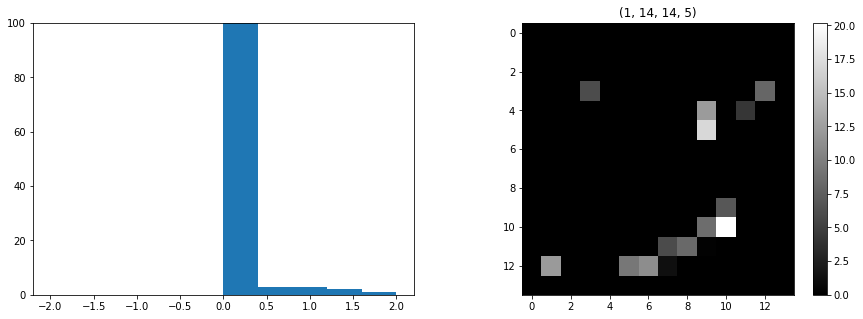

In [54]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)
plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

# Classification

## Fully Connected

### Flatten

In [56]:
layer = tf.keras.layers.Flatten()
flatten = layer(pool_output)
flatten.shape

TensorShape([1, 980])

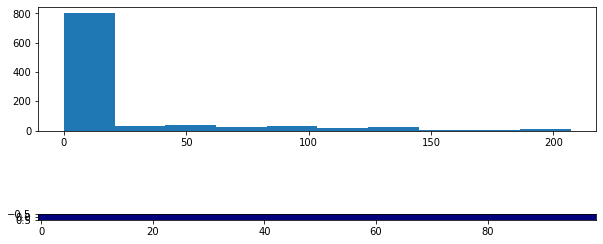

In [59]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:, :100], 'jet')
plt.show()

### Dense

In [60]:
layer = tf.keras.layers.Dense(32, activation='relu')
output = layer(flatten)
output.shape

TensorShape([1, 32])

In [62]:
layer2 = tf.keras.layers.Dense(10, activation='relu')
output = layer2(output)
output.shape

TensorShape([1, 10])

### Dropout

In [63]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)
output.shape

TensorShape([1, 10])